## Class 10
## Plotting Points data: 311 data 📲 📲 📲 📲 

c4sue NYU @avigailvantu

Today we will continue to work with Pandas and Matplotlib. We will also create some maps using geopandas. Looking into 311 complaints from the past month and from the same period in 2019 we will compare, group and visualize the city’s trends. Along the way we will create a GeoDataFrame, this is a geographical format that is similar enough to a data frame but has an extra dimension of geographical attributes to it.  Think of the times where we loaded a CSV data into QGIS and needed to merge with a swapfile of assign column to a geographical unit.

This week we will be doing something similar, only with that we will transform a csv (which we will read into a data frame) and then assign columns in the data to represent geometry. That would enable us to then visualize the data quite easily. We’ll some pretty simple, yet cool, ways to do so!

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

For this assignment I downloaded the 311 data from the NYC Open Data platform. I wanted to look into how people in the city complaint patterns were in the past month. In order to get a relative understating I will compare the data from 2020 to the same dates last year. Comparing similar periods in between years is a common method in highlighting changes and trends.  Thinking about time series, many phenomenas are seasonal. Which is why comparing one month to the previous month (feb 2020 in our case) would be tricker. Having said that, even the same period in two separate years is likely to have some differences, but hopefully less. 

- Data 2020: March 13th 2020-April 13th 2020
- Data 2019: March 13th 2019-April 13th 2019 

Both datasets are in this repo, but you are welcome to download it yourself too 

In [3]:
#load 311 data 1 for this year and one for last year: 

data20 = pd.read_csv('311_March_April2020.csv')

#load 2019 data 

data19 = pd.read_csv('311_March-April2019.csv')

c:\users\iimeg\venv\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\iimeg\venv\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data20.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45810033,03/13/2020 12:00:00 AM,03/13/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025.0,731 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.792597,-73.967706,"(40.79259692123458, -73.96770625127942)"
1,45810013,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11223.0,813 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.598134,-73.962817,"(40.5981342031965, -73.96281658993895)"
2,45789543,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11430.0,JFK BUILDING 59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.649150,-73.782833,"(40.64915023440445, -73.78283340618265)"
3,45775220,03/13/2020 12:00:00 AM,03/27/2020 10:30:11 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11235.0,2255 EMMONS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.583689,-73.944691,"(40.583689259183544, -73.94469056810513)"
4,45776994,03/13/2020 12:00:33 AM,03/13/2020 01:58:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10034.0,4892 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867210,-73.922534,"(40.86720968747772, -73.92253385348529)"


In [5]:
data19.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,41949440,03/13/2019 12:00:00 AM,NaN,DEP,Department of Environmental Protection,FATF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41947950,03/13/2019 12:00:00 AM,03/27/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41936816,03/13/2019 12:00:00 AM,03/26/2019 07:53:13 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10029,334 EAST 100 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.786187,-73.943778,"(40.78618701810895, -73.94377846199588)"
3,41936820,03/13/2019 12:00:00 AM,03/14/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Mixed Use Building,11377,41-35 50 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745851,-73.914349,"(40.745851381123025, -73.91434915337972)"
4,41939629,03/13/2019 12:00:00 AM,03/15/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11225,426 EASTERN PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669515,-73.954367,"(40.669514860130114, -73.95436678857554)"


In [6]:
print ('shape 2020',data20.shape)
print ('shape 2019',data19.shape)

shape 2020 (137829, 41)
shape 2019 (229734, 41)


What are the changes between 2019 and 2020 data in terms of quantities of non emargency complaints in NYC? 

In [7]:
#What are the columns in the data? 
print ('2020 columns:',data20.columns)
print ('2019 columns:',data19.columns)

2020 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')
2019 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Loca

# 311 data for 2019 and 2020 data by agency: 

Let's look into the "value_counts" function. That would return the number of values for each value in the Agencey column. Meaning we will get a list of how many complaints were chanaled into each agency. 

Check out this URL for the agencies acronyms
https://www1.nyc.gov/site/mocs/about/agencies-acronyms-initialisms.page

In [8]:
data19['Agency'].value_counts()

NYPD     64013
HPD      46643
DSNY     38190
DOT      26634
DEP      15647
DOB      13716
DPR       6655
DOHMH     5734
DOF       5249
TLC       2780
DCA       1399
DHS        996
HRA        864
DFTA       739
DOE        160
EDC        116
DCAS        87
DOITT       51
ACS         28
TAX         23
NYCEM        6
DCP          3
TAT          1
Name: Agency, dtype: int64

In [9]:
data20['Agency'].value_counts()

NYPD     59168
HPD      27735
DOT      13971
DCA      12091
DEP       7707
DSNY      4278
DOB       4226
DOHMH     3372
DPR       3152
DHS       1316
TLC        468
EDC        273
DOE         62
DOITT       10
Name: Agency, dtype: int64

- What are some of the differences in patterns we are seeing in which agencies the calls have been channeled to between 2019 and 2020?  Which agencies have been seeing less activity and which ones more? 

So far we worked mainly with Pandas (also some pyplot, numpy and datetime). In addiition to all these pacakges Pyhton also has some pretty neat geographical features! Let's check out a few of them on our data: 

## From DataFrame to GeoDataFrame 🧮

GeoDataFrame is a data frame that includes one column with a "special" status. This column is the "geometry" column which enbales Python to refer to the data as geogpraphical. In many cases, like in our case, we will not have the "geomtry" column built-in in the data. Instead, we will usually have x any y or Latitue and Longtitude that we will tranform into the needed format. 

To go from DataFRame---> GeoDataFrame:
- we would want to tell python which columns can be used as "geometry". 

Note that the Geometry columns looks like this


- POINT (LON LAT) 

The point() format will be created using the GeoDataFrame function. We will only need to tell Python which columns in the data are each (lon, lat).  


In [10]:
#transform data into geo data frame: 

gdf20 = gpd.GeoDataFrame(
    data20, geometry=gpd.points_from_xy(data20.Longitude, data20.Latitude))

gdf19 = gpd.GeoDataFrame(
    data19, geometry=gpd.points_from_xy(data19.Longitude, data19.Latitude))

#note that here we tell Python that the column: 
#data20.Longitude is the longtitute and data20.Latitude is the latitude. 

In [11]:
#check out our GeoDataFrame--> note the "geometry" column was added (all the way to the right)
gdf20.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,45810033,03/13/2020 12:00:00 AM,03/13/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025.0,731 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.792597,-73.967706,"(40.79259692123458, -73.96770625127942)",POINT (-73.96771 40.79260)
1,45810013,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11223.0,813 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,40.598134,-73.962817,"(40.5981342031965, -73.96281658993895)",POINT (-73.96282 40.59813)
2,45789543,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11430.0,JFK BUILDING 59,...,NaN,NaN,NaN,NaN,NaN,NaN,40.649150,-73.782833,"(40.64915023440445, -73.78283340618265)",POINT (-73.78283 40.64915)


## Now we can fianly visualize the data: 

First: plot all points for the layer, not I am setting the marker zise on 0.3 since there are so many of them!! 

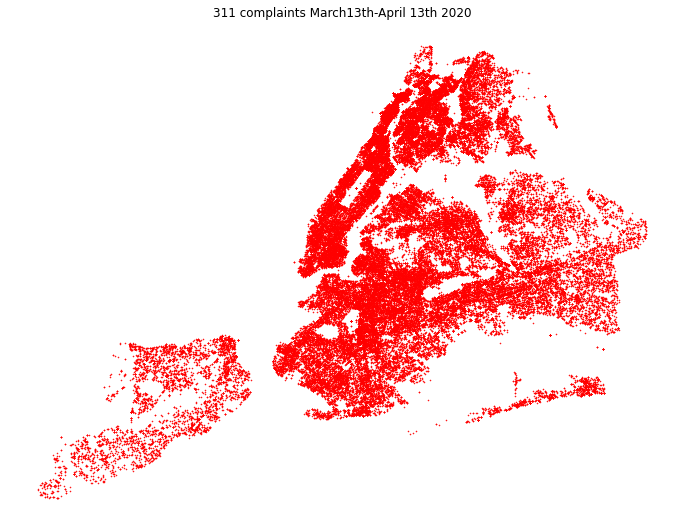

In [13]:
#plot all 2020 data:
gdf20.plot( color='red',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2020')
plt.show()

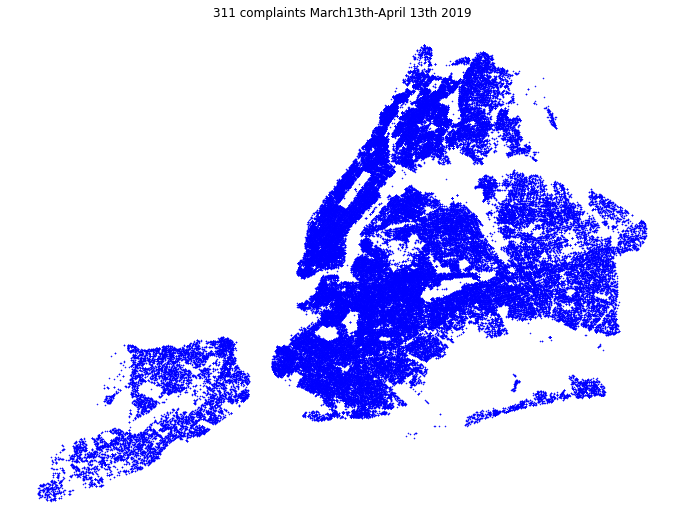

In [14]:
#plot all 2019 data: 
gdf19.plot( color='blue',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2019')
plt.show()

# Exmine one agency: 
### HPD (Housing Preservation & Development)

In order to make better sense of what are people reporting less in these past weeks, we will take a closer look at the different agencies complaints. 

We will start with HPD: 

In [15]:
#filter only hpd

hpd19 = gdf19.loc[gdf19['Agency']=='HPD']
hpd20 = gdf20.loc[gdf20['Agency']=='HPD']

## Plot HPD data for both 2019 and 2020 

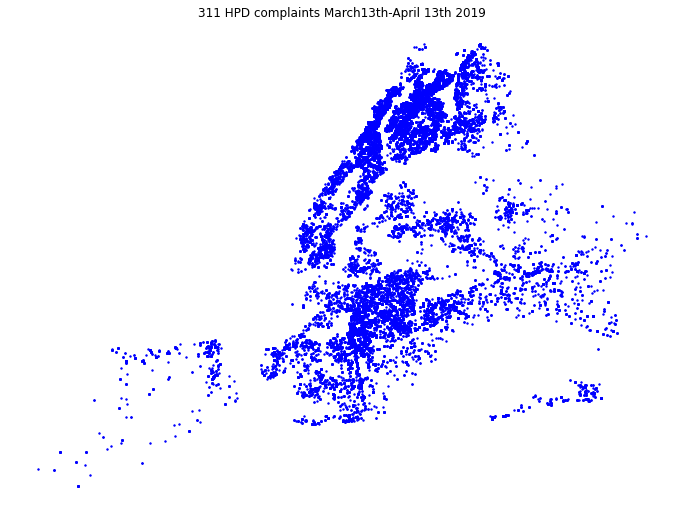

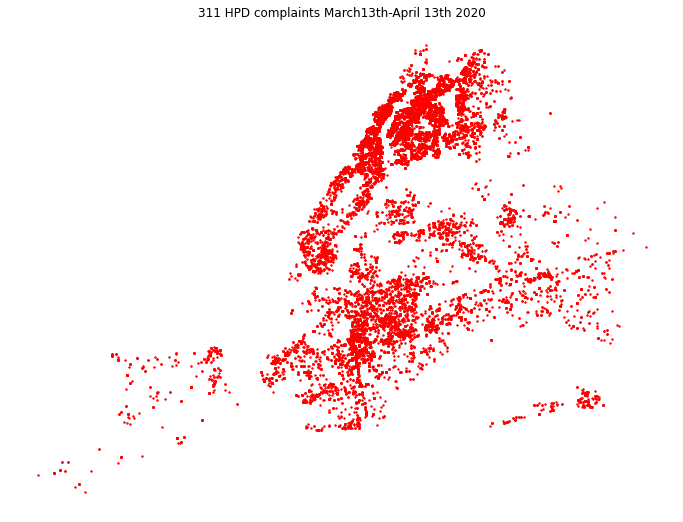

In [16]:
hpd19.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2019')
hpd20.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2020')
plt.show()

 Q: Which areas seem to see the most impact in terms of "lost complaints"? 
 
## Another way for us to look into the data is to sub-slice it again: 

Now dive into the complaint types in the HPD complaints. So we can learn what are the types of housing complaint we are seeing. that would also help us compare what were some of the changes b/t both periods

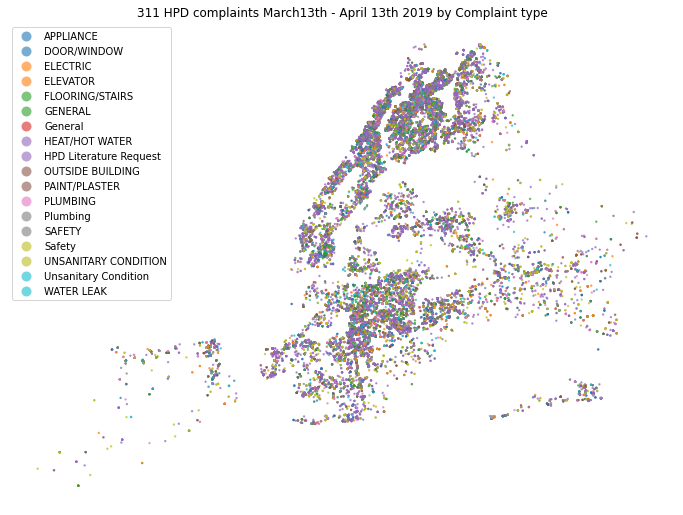

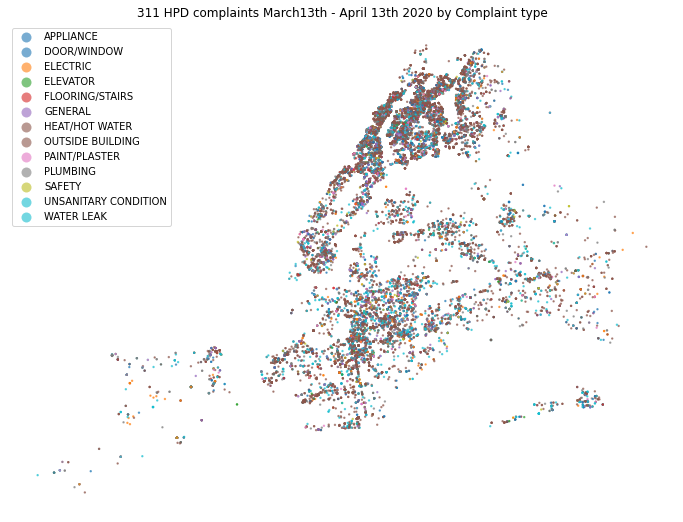

In [17]:
#plot hpd by complaint type:

#1. for 2019 
ax = hpd19.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March13th - April 13th 2019 by Complaint type')
plt.axis('off')
plt.show()


#2. for 2020 
ax = hpd20.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March13th - April 13th 2020 by Complaint type')
plt.axis('off')
plt.show()

What information can we take away from these two maps? 

# Another way to look into the complaint types: 
On top of visualizng the data we can also look into the number of complaints of each type. An easy way to do so is to use the Group.by command. This is a pretty timple command that has a lot of options (more about it on other classes!). 

The main thing to know about group.by right now is that group.by operates on a dataframe so that it basically does 3 main things: 

1. Split : take the data and splits it according to the grouping condition 
2. Apply: calculates what we want it to do: sum, means count etc
3. Combine: it combines the data into new groups 




In [18]:
hpd19['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'PLUMBING', 'APPLIANCE', 'GENERAL',
       'PAINT/PLASTER', 'UNSANITARY CONDITION', 'OUTSIDE BUILDING',
       'ELECTRIC', 'SAFETY', 'FLOORING/STAIRS', 'DOOR/WINDOW',
       'WATER LEAK', 'HPD Literature Request', 'ELEVATOR',
       'Unsanitary Condition', 'General', 'Safety', 'Plumbing'],
      dtype=object)

In our case we will count group by complaint type so that: Python will Split the data according to each type of complaint (hot water, windows etc). Then it will Apply, meaning it would count how many of each compliant type the data has. Finally, Python will Combine the new grouped data. So in our case that would be number of complaints per each complaint type. Note that by doing so, our data frame structure will changes completely so that each row will represent a complaint type, and the data in the cells will be the count of how many of them are there in our data.  All that in one line of code :-) 

In [19]:
#group.by hpd complaints 

#1. for 2019
hpd19_count_type = hpd19.groupby(['Complaint Type']).count()
#1. for 2020
hpd20_count_type = hpd20.groupby(['Complaint Type']).count()

In [21]:
#look at out new data for 2019 
hpd19_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,997,997,996,997,997,997,997,997,997,997,...,0,0,0,0,0,0,997,997,997,997
DOOR/WINDOW,3001,3001,2998,3001,3001,3001,3001,3000,3001,3001,...,0,0,0,0,0,0,3000,3000,3000,3001
ELECTRIC,1904,1904,1903,1904,1904,1904,1904,1904,1904,1904,...,0,0,0,0,0,0,1904,1904,1904,1904
ELEVATOR,90,90,90,90,90,90,90,90,90,90,...,0,0,0,0,0,0,90,90,90,90
FLOORING/STAIRS,2088,2088,2079,2088,2088,2088,2088,2088,2088,2088,...,0,0,0,0,0,0,2088,2088,2088,2088


In [22]:
#and for 2020
hpd20_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,704,704,146,704,704,704,704,704,704,704,...,0,0,0,0,0,0,704,704,704,704
DOOR/WINDOW,1194,1194,338,1194,1194,1194,1194,1194,1194,1194,...,0,0,0,0,0,0,1194,1194,1194,1194
ELECTRIC,827,827,340,827,827,827,827,827,827,827,...,0,0,0,0,0,0,827,827,827,827
ELEVATOR,121,121,85,121,121,121,121,121,121,121,...,0,0,0,0,0,0,121,121,121,121
FLOORING/STAIRS,636,636,191,636,636,636,636,636,636,636,...,0,0,0,0,0,0,636,636,636,636


In [23]:
#because the all columns look the same we will remove them and only keep the first one
hpd19_count_type = hpd19_count_type['Unique Key']
hpd20_count_type = hpd20_count_type['Unique Key']

In [24]:
hpd19_count_type.head()

Complaint Type
APPLIANCE           997
DOOR/WINDOW        3001
ELECTRIC           1904
ELEVATOR             90
FLOORING/STAIRS    2088
Name: Unique Key, dtype: int64

In [25]:
#now let's see the most common HPD complaints for both March/April 2019 and 2020:

# sort data 

hpd19_count_type = hpd19_count_type.sort_values()

hpd20_count_type = hpd20_count_type.sort_values()

In [26]:
#5 most common complaints in 2019 were: 
hpd19_count_type.tail(5)

Complaint Type
DOOR/WINDOW              3001
PLUMBING                 4065
PAINT/PLASTER            4661
UNSANITARY CONDITION     6218
HEAT/HOT WATER          17742
Name: Unique Key, dtype: int64

In [27]:

#5 most common complaints in 2020  were: 
hpd20_count_type.tail(5)

Complaint Type
DOOR/WINDOW              1194
PAINT/PLASTER            1499
PLUMBING                 2427
UNSANITARY CONDITION     2988
HEAT/HOT WATER          14840
Name: Unique Key, dtype: int64

 We see that the 5 most common HPD complaints in 2019 and 2020 remained the same. But we are seeing a lot less of many of these types (e.g. more than half less Unsanitary conditions  in 2020 compared to 2019)

## here are the top 5 for both years :
1. Heat/hot water --> 14840 in 2020 and 17742 in 2019 
2. Unsanitary conditions --> 2988 in 2020 and 6218	in 2019 
3. Paint/ Plaster --> 1499 in 2020 and 4661 in 2019 
4. Plumbing --> 2427 in 2020 and 4065 in 2019
5. Door/Window --> 1194 in 2020 and 3001 in 2019 

## Assignment:

Your turn: 

So far we worked on the HPD data. 

We will now divide into groups, when each group will look into another agency complaints: 

# Group 1: NYPD
# Group 2: DOT 
# Group 3: DEP 
# Group 4: DSNY 
# Group 5: DOHMH 

For each groups: 

1. Please filter the subset of the data that has *YOUR* Agencey name
2. Plot, summarize and group.by the data for both 2019 and 2020 
 
Deliver:  
- a. What are the patterns in *YOUR* agency complaints between the 2019 and 2020 data? 
- b. What are some geogrpaphical patterns you are seeing comparing both years?

In class: present your main findings. For you homework: submit your jupyter notebook. In addition on your NYU classes submissions write a short summary of your findings. 

Due: April 27th 2020 before class.

In [29]:
data20 = pd.read_csv('311_March_April2020.csv')
data19 = pd.read_csv('311_March-April2019.csv')

c:\users\iimeg\venv\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
gdf20 = gpd.GeoDataFrame(data20, geometry = gpd.points_from_xy(data20.Longitude, data20.Latitude))
gdf19 = gpd.GeoDataFrame(data19, geometry = gpd.points_from_xy(data19.Longitude, data19.Latitude))


In [32]:
dohmh20 = gdf20.loc[gdf20['Agency']=='DOHMH']
dohmh19 = gdf19.loc[gdf19['Agency']=='DOHMH']

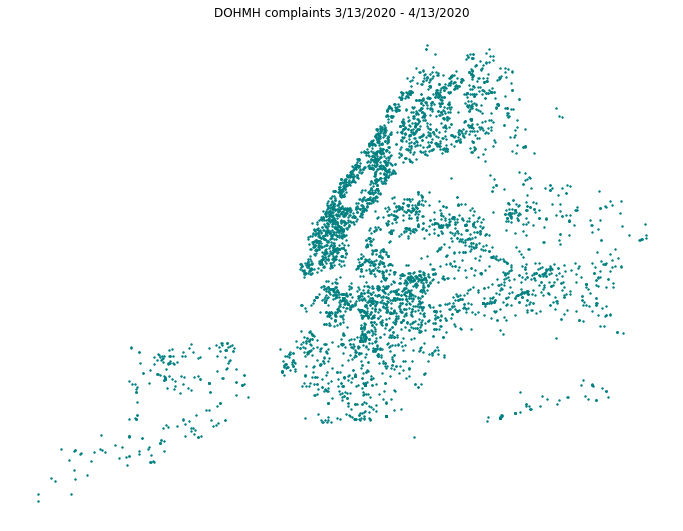

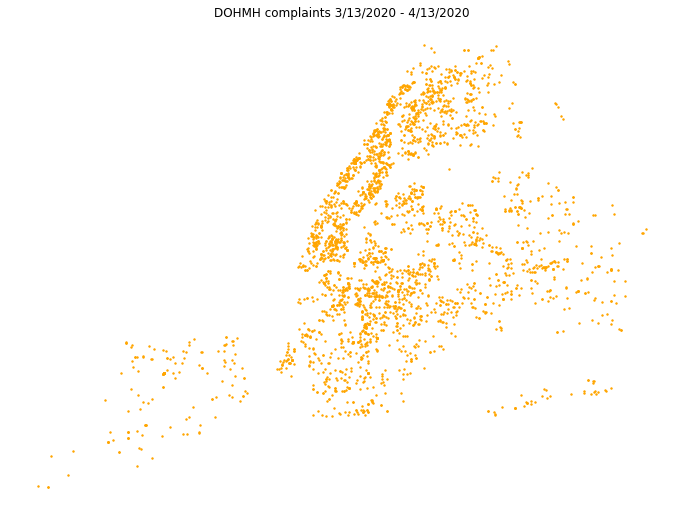

In [62]:
dohmh19.plot(color = 'teal', legend = True, figsize = (12,12), markersize = 2)
plt.title('DOHMH complaints 3/13/2020 - 4/13/2020')
plt.axis('off')
plt.show()

dohmh20.plot(color = 'orange', legend = True, figsize = (12,12), markersize = 2)
plt.title('DOHMH complaints 3/13/2020 - 4/13/2020')
plt.axis('off')
plt.show()

In [46]:
dohmh20.head(30)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,45810033,03/13/2020 12:00:00 AM,03/13/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025.0,731 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.792597,-73.967706,"(40.79259692123458, -73.96770625127942)",POINT (-73.96771 40.79260)
1,45810013,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11223.0,813 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,40.598134,-73.962817,"(40.5981342031965, -73.96281658993895)",POINT (-73.96282 40.59813)
2,45789543,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11430.0,JFK BUILDING 59,...,NaN,NaN,NaN,NaN,NaN,NaN,40.649150,-73.782833,"(40.64915023440445, -73.78283340618265)",POINT (-73.78283 40.64915)
3,45775220,03/13/2020 12:00:00 AM,03/27/2020 10:30:11 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11235.0,2255 EMMONS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.583689,-73.944691,"(40.583689259183544, -73.94469056810513)",POINT (-73.94469 40.58369)
102,45810090,03/13/2020 12:40:19 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11106.0,29-08 31 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.765012,-73.924898,"(40.76501158395667, -73.92489812662049)",POINT (-73.92490 40.76501)
119,45805017,03/13/2020 12:46:37 AM,03/13/2020 12:46:37 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10025.0,255 WEST 93 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.793002,-73.973831,"(40.793001949931174, -73.97383114235681)",POINT (-73.97383 40.79300)
145,45812129,03/13/2020 12:57:13 AM,03/13/2020 04:21:54 PM,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Food Protection,Restaurant/Bar/Deli/Bakery,11212.0,1540 EAST NEW YORK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.672108,-73.911243,"(40.672108189990254, -73.91124266322322)",POINT (-73.91124 40.67211)
297,45789856,03/13/2020 02:36:30 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,11207.0,185 WORTMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.656424,-73.886208,"(40.65642443378326, -73.88620783561316)",POINT (-73.88621 40.65642)
376,45796537,03/13/2020 04:09:27 AM,03/13/2020 04:21:55 PM,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Food Spoiled,Restaurant/Bar/Deli/Bakery,10020.0,70 WEST 49 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.758922,-73.980086,"(40.75892179839503, -73.98008560340865)",POINT (-73.98009 40.75892)
381,45789737,03/13/2020 04:17:19 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Other (Explain Below),3+ Family Apartment Building,10472.0,1259 WARD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.830235,-73.877661,"(40.83023531004451, -73.8776609295752)",POINT (-73.87766 40.83024)


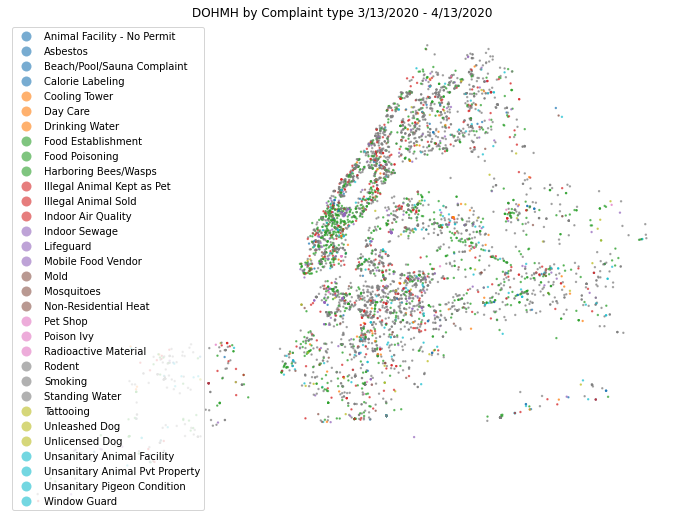

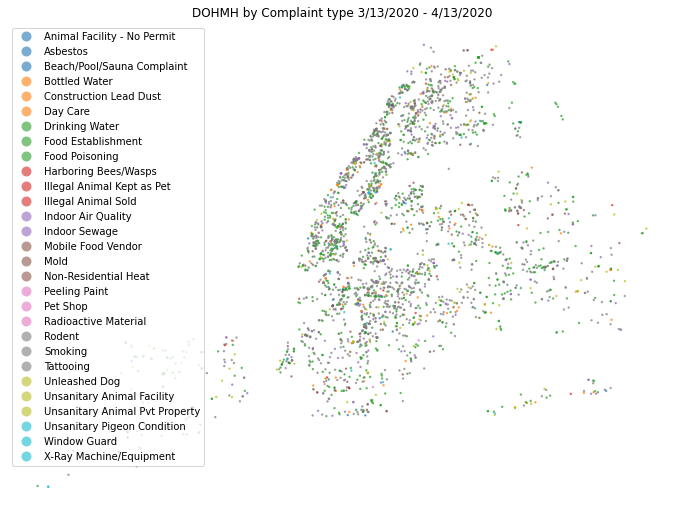

In [51]:
ax = dohmh19.plot(column = 'Complaint Type', legend = 'True', figsize = (12,12), alpha = 0.6, markersize = 2)
plt.title('DOHMH by Complaint type 3/13/2020 - 4/13/2020')
plt.axis('off')
plt.show()

ax = dohmh20.plot(column = 'Complaint Type', legend = 'True', figsize = (12,12), alpha = 0.6, markersize = 2)
plt.title('DOHMH by Complaint type 3/13/2020 - 4/13/2020')
plt.axis('off')
plt.show()

In [35]:
dohmh20['Complaint Type'].unique()

array(['Food Poisoning', 'Rodent', 'Food Establishment',
       'Indoor Air Quality', 'Mobile Food Vendor', 'Smoking',
       'Unsanitary Animal Pvt Property', 'Unsanitary Pigeon Condition',
       'Construction Lead Dust', 'Illegal Animal Kept as Pet', 'Mold',
       'Unleashed Dog', 'Asbestos', 'Animal Facility - No Permit',
       'Indoor Sewage', 'Drinking Water', 'Pet Shop',
       'Beach/Pool/Sauna Complaint', 'Day Care',
       'Unsanitary Animal Facility', 'Radioactive Material',
       'Non-Residential Heat', 'Bottled Water', 'Tattooing',
       'Illegal Animal Sold', 'Window Guard', 'Harboring Bees/Wasps',
       'Peeling Paint', 'X-Ray Machine/Equipment'], dtype=object)

In [58]:
dohmh19_count_type = dohmh19.groupby(dohmh19['Complaint Type']).count()
dohmh20_count_type = dohmh20.groupby(dohmh20['Complaint Type']).count()

dohmh19_count_type = dohmh19_count_type['Unique Key']
dohmh20_count_type = dohmh20_count_type['Unique Key']

dohmh19_count_type = dohmh19_count_type.sort_values()
dohmh20_count_type = dohmh20_count_type.sort_values()

dohmh19_count_type.tail(10)


Complaint Type
Standing Water                      60
Day Care                            71
Indoor Sewage                      110
Mobile Food Vendor                 217
Unsanitary Animal Pvt Property     218
Smoking                            218
Food Poisoning                     271
Indoor Air Quality                 440
Food Establishment                 966
Rodent                            2830
Name: Unique Key, dtype: int64

In [59]:
dohmh20_count_type.tail(10)

Complaint Type
Indoor Sewage                       50
Construction Lead Dust              73
Mobile Food Vendor                  85
Unleashed Dog                       89
Food Poisoning                      94
Unsanitary Animal Pvt Property     114
Indoor Air Quality                 236
Smoking                            243
Food Establishment                 886
Rodent                            1312
Name: Unique Key, dtype: int64

What are the patterns in YOUR agency complaints between the 2019 and 2020 data? What are some geographical patterns you are seeing comparing both years?
    
    Regarding the DOHMH agency complaints between the 2019 and 2020 data, the number of complaints have dropped; by comparing the figures "DOHMH complaints 3/13/2019 - 4/13/2019" and "DOHMH complaints 3/13/2020 - 4/13/2020" the latter figure shows a lower density of complaint points. In both cases, the complaints are most concentrated near the Manhattan, Upper-Brooklyn, and Bronx districts. This may be because of the tighter infrastructure seen in places like Manhattan and the northern parts of Brooklyn. In these areas, citizens are also generally more likely to travel by foot or by subway and be exposed to potential sources of complaints than citizens in Staten Islands or Queens—often commuting by private vehichles—would be.
    The decrease in complaints can likely be explained by the current circumstances related to the quarantine enforced in response to the recent covid-19 pandemic. As the majority of US citizens remain in their homes, fewer people are likely to complain or even be aware of Mobile Food Vendor or Construction Lead Dust issues when they have no apparent reason to be outside in public areas. To further illustrate this notion, by inspection of the dohmh_count_type_tail dataframes as well as the Complaint type plots it is evident that Unleashed Dog (indicated by red markers) and Day Care complaints (indicated by orange markers) have, since 2019, dropped out of the 10 most popular complaints. In contrast, complaints for certain issues have actually increased; people relegated to their homes have apparently found greater reason/motivation to report smoking issues, a problem largely unrelated to the drastic lifestyle changes that have taken place for so many US citizens; given a city as densely populated as NYC, this is to be expected.     
